In [107]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/")


In [108]:
#### Variables to loop
from PeriodictableTools import PeriodictableTools
table_tool = PeriodictableTools()
import pandas as pd
from LoadMultiFiles import LoadOneFileUproot
from copy import copy
from FunctionFor_dE_dx import GetDirForNoOpticalAnalyze
from GetPhysicsProperty import NameToPDGID
v_name_to_gen = ["H_2","He_4", "Li_6", "C_12", "Ne_20"]
v_L_LS = [1, 3, 5, 10]
v_L_tank = [0.2, 1, 3, 5]
v_material = ["Acrylic", "Quartz"]

list_filter = ["step_x","step_y", "step_z",'Edep_event', 'xyz_center', 'step_trackID','step_isCherenkov',
                'step_chamberID']

load_npz = True

# dir_dE_dx_to_df = {"ion":[], "dE/dx":[], "dE/dx(main track)":[], "L_LS":[],
#                    "L_tank":[], "material":[], "u":[], "BeamE":[]}
dir_dE_dx_to_df = {}
from importlib import reload
import LoadMultiFiles
reload(LoadMultiFiles)
from PandasTools import AlignDirElements
from LoadMultiFiles import MergeEventsDictionary

if load_npz:
    with np.load("/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_study_energy_smear/dict_to_df.npz", allow_pickle=True) as f:
        dir_dE_dx_to_df = f["dir_events"].item()
else:
    for material in v_material:
        for L_LS in v_L_LS:
            for L_tank in v_L_tank:
                for name_ion in v_name_to_gen:
                    name_suffix = f"_LS_{L_LS}mm_tank_{L_tank}mm_{material}"
                    path_file = f"/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_study_energy_smear/root/{name_ion}{name_suffix}.root"
                    print(path_file)

                    dir_events = LoadOneFileUproot(path_file, name_branch="GdLS_log", list_branch_filter=list_filter)
                    dir_geninfo = LoadOneFileUproot(path_file, name_branch="genInfo")
                    pdgID_certain,dir_dE_dx =GetDirForNoOpticalAnalyze(dir_events,dir_geninfo, pdgID=NameToPDGID(name_ion))

                    dir_dE_dx["ion"] = name_ion
                    dir_dE_dx["L_LS"] = L_LS
                    dir_dE_dx["L_tank"] = f"{L_tank} mm ({material})"
                    # dir_dE_dx["material"] = material

                    if len(dir_dE_dx_to_df)==0:
                        dir_dE_dx_to_df = {key:[] for key in dir_dE_dx.keys()}
                    dir_dE_dx_to_df = MergeEventsDictionary([dir_dE_dx_to_df, AlignDirElements(dir_dE_dx)])

    np.savez("/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_study_energy_smear/dict_to_df.npz", dir_events=dir_dE_dx_to_df)



df_dE_dx = pd.DataFrame.from_dict(dir_dE_dx_to_df)
df_dE_dx

/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_study_energy_smear/root/H_2_LS_1mm_tank_0.2mm_Acrylic.root
/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_study_energy_smear/root/He_4_LS_1mm_tank_0.2mm_Acrylic.root
/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_study_energy_smear/root/Li_6_LS_1mm_tank_0.2mm_Acrylic.root
/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_study_energy_smear/root/C_12_LS_1mm_tank_0.2mm_Acrylic.root
/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_study_energy_smear/root/Ne_20_LS_1mm_tank_0.2mm_Acrylic.root
/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_study_energy_smear/root/H_2_LS_1mm_tank_1mm_Acrylic.root
/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_study_energy_smear/root/He_4_LS_1mm_tank_1mm_Acrylic.root
/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_study_energy_smear/root/Li_6_LS_1mm_tank_1mm_Acrylic.root
/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_study_energy_smear/root/C_12_LS_1mm_tank_1mm_Acryl

,Einit,dE_dx,dE_dx_main_track,Equench,Edep,dx,index,ion,L_LS,L_tank
0,507.078,0.499810,0.360725,0.347542,0.360725,1.024108,0,H_2,1,0.2 mm (Acrylic)
1,507.078,0.369756,0.272666,0.265221,0.272666,1.003686,1,H_2,1,0.2 mm (Acrylic)
2,507.078,0.489600,0.315596,0.304287,0.315596,1.026061,2,H_2,1,0.2 mm (Acrylic)
3,507.078,0.285560,0.285560,0.279515,0.285560,1.000000,3,H_2,1,0.2 mm (Acrylic)
4,507.078,0.579940,0.316366,0.303012,0.316366,1.021602,4,H_2,1,0.2 mm (Acrylic)
...,...,...,...,...,...,...,...,...,...,...
158230,5153.460,19.068160,36.284508,186.313666,362.845352,130.247407,995,Ne_20,10,5 mm (Quartz)
158231,5153.460,18.681444,36.664664,190.133952,366.650542,149.109306,996,Ne_20,10,5 mm (Quartz)
158232,5153.460,18.895238,36.265452,187.073443,362.661017,132.322999,997,Ne_20,10,5 mm (Quartz)
158233,5153.460,18.433137,37.022108,193.165677,370.222609,147.832417,998,Ne_20,10,5 mm (Quartz)


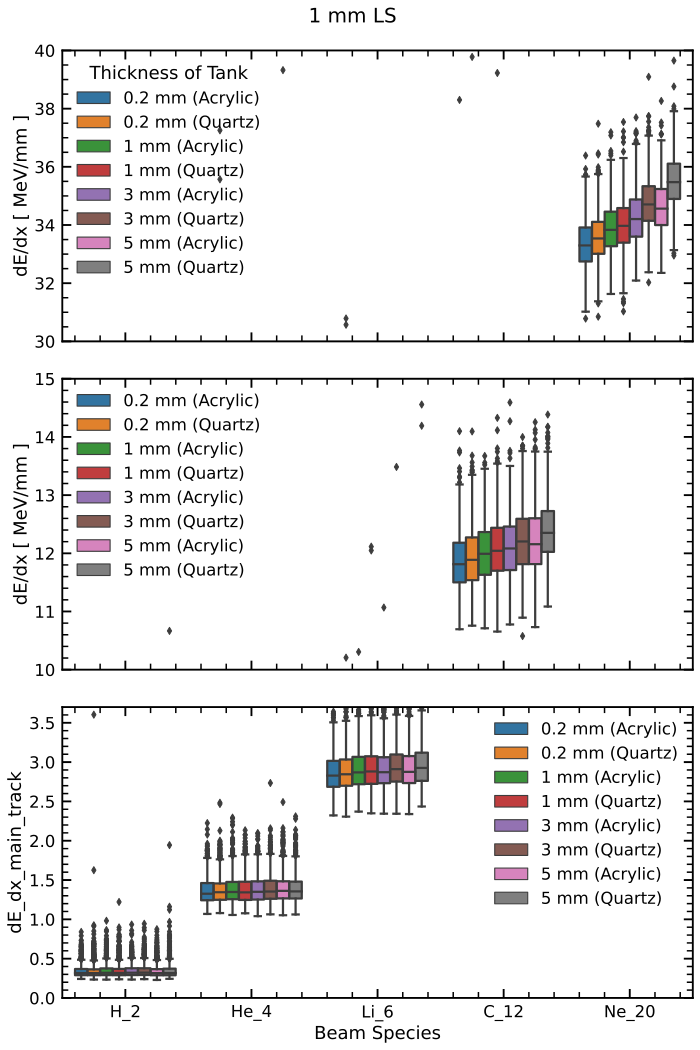

In [120]:
import seaborn as sns
sns.set_context("talk")
fig,axes_total = plt.subplots(3,1, sharex=True, figsize=(10,15))
# for i_fig , material in enumerate(v_material):
L_LS_to_plot = 1
v_order_hue = []
for L_tank in v_L_tank:
    for material in v_material:
        v_order_hue.append(f"{L_tank} mm ({material})")

if True:
    df_dE_dx_L_LS_1mm = df_dE_dx[ (df_dE_dx["L_LS"]==L_LS_to_plot)]
    axes = axes_total
    sns.boxplot(x="ion",hue="L_tank", y='dE_dx_main_track',data=df_dE_dx_L_LS_1mm, ax=axes[2], hue_order=v_order_hue)
    axes[2].set_ylim(0,3.7)
    # plt.semilogy()
    sns.boxplot(x="ion",hue="L_tank", y='dE_dx_main_track',data=df_dE_dx_L_LS_1mm, ax=axes[1], hue_order=v_order_hue)
    axes[1].set_ylim(10,15)
    sns.boxplot(x="ion",hue="L_tank", y='dE_dx_main_track',data=df_dE_dx_L_LS_1mm, ax=axes[0],hue_order=v_order_hue)
    axes[0].set_ylim(30,40)

    axes[0].legend(title="Thickness of Tank")
    axes[1].legend()
    axes[2].legend()

    axes[0].set_xlabel("")
    axes[1].set_xlabel("")
    axes[2].set_xlabel("Beam Species")
    axes[0].set_ylabel("dE/dx [ MeV/mm ]")
    axes[1].set_ylabel("dE/dx [ MeV/mm ]")
    fig.suptitle(f"{L_LS_to_plot} mm LS", fontsize=20)
    fig.tight_layout()

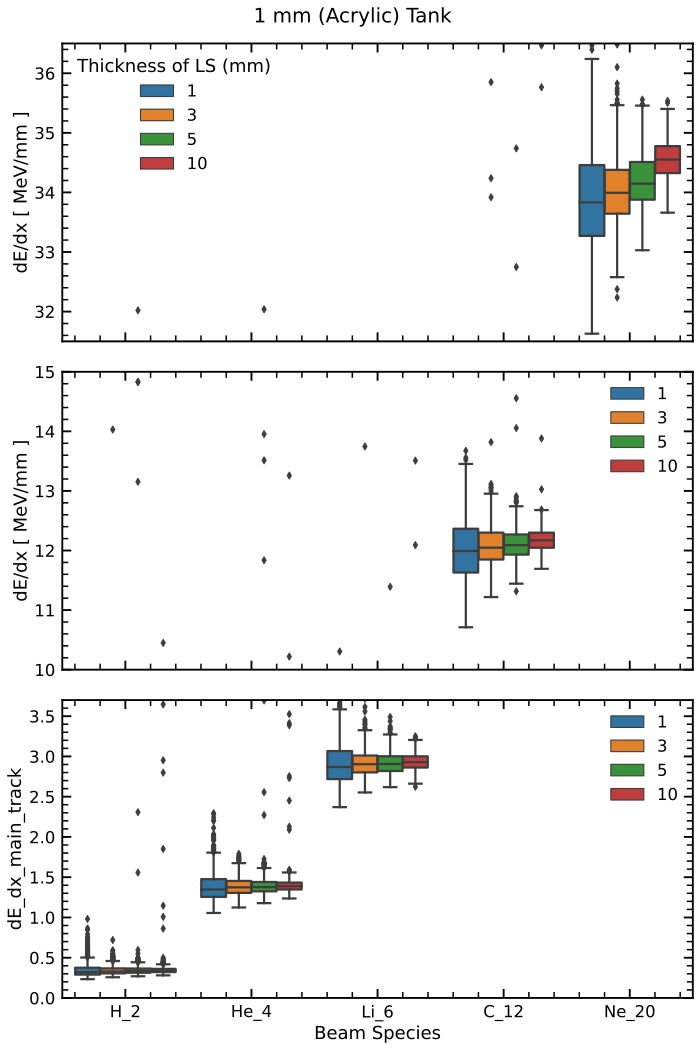

In [119]:
import seaborn as sns
sns.set_context("talk")
fig,axes_total = plt.subplots(3,1, sharex=True, figsize=(10,15))
# for i_fig , material in enumerate(v_material):
L_LS_to_plot = 1
condition = "1 mm (Acrylic)"
if True:
    df_dE_dx_L_LS_1mm = df_dE_dx[ (df_dE_dx["L_tank"]=="1 mm (Acrylic)")]
    axes = axes_total
    sns.boxplot(x="ion",hue="L_LS", y='dE_dx_main_track',data=df_dE_dx_L_LS_1mm, ax=axes[2])
    axes[2].set_ylim(0,3.7)
    # plt.semilogy()
    sns.boxplot(x="ion",hue="L_LS", y='dE_dx_main_track',data=df_dE_dx_L_LS_1mm, ax=axes[1])
    axes[1].set_ylim(10,15)
    sns.boxplot(x="ion",hue="L_LS", y='dE_dx_main_track',data=df_dE_dx_L_LS_1mm, ax=axes[0])
    axes[0].set_ylim(31.5,36.5)

    axes[0].legend(title="Thickness of LS (mm)")
    axes[1].legend()
    axes[2].legend()

    axes[0].set_xlabel("")
    axes[1].set_xlabel("")
    axes[2].set_xlabel("Beam Species")
    axes[0].set_ylabel("dE/dx [ MeV/mm ]")
    axes[1].set_ylabel("dE/dx [ MeV/mm ]")
    fig.suptitle(f"{condition} Tank", fontsize=20)
    fig.tight_layout()

In [110]:
# import seaborn as sns
# sns.set_context("talk")
# fig,axes_total = plt.subplots(2,2, sharex=True, figsize=(16,10))
# for i_fig , material in enumerate(v_material):
#     print(material)
#     df_dE_dx_L_LS_1mm = df_dE_dx[ (df_dE_dx["L_LS"]==1) & (df_dE_dx["material"]=="Acrylic")]
#     axes = axes_total[:,i_fig]
#     sns.boxplot(x="ion",hue="L_tank", y='dE_dx_main_track',data=df_dE_dx_L_LS_1mm, ax=axes[1])
#     axes[1].set_ylim(0,3.7)
#     # plt.semilogy()
#     g1 =sns.boxplot(x="ion",hue="L_tank", y='dE_dx_main_track',data=df_dE_dx_L_LS_1mm, ax=axes[0])
#     axes[0].set_ylim(30,40)
#     # axes[0].legend([],[], frameon=False)
#     axes[1].legend()
#
#     axes[0].set_xlabel("")
#     axes[1].set_xlabel("Thickness of Tank [ mm ]")
#     axes[0].set_ylabel("dE/dx [ MeV/mm ]")
#     axes[1].set_ylabel("dE/dx [ MeV/mm ]")
#     fig.tight_layout()
